# Coding Exercise # 2 : Laser Dynamics

# Intro

In the lectures, we solved the coupled-rate equations for a multi-level laser system assuming a *steady-state*. In the steady-state, the laser output is constant. 

However, when a laser is first switched on, *relaxation oscillations* can occur before the steady-state is reached, i.e. the laser output intensity exhbitis a series of regularly spaced spikes that decay away - even with constant pumping! 

The origin of *relaxation oscillations* is best understood when you have familiarised yourself with gain clamping (Lecture 5.4): As the laser intensity increases from zero it overshoots the steady-state intensity. This depletes the gain due to gain saturation, which in turn reduces the intensity which allows the gain to be pumped up again, and so on. This leads to intensity spikes that eventually settle down to a constant, steady-state intensity.

This behaviour is described by two coupled, nonlinear differential equations. These cannot be solved analytically in the general case.

However, in this exercise you will solve these equations numerically.


## Laser Dynamics
The differential equations that you need to solve are:

## $\frac{d\phi(t)}{dt}=KM_2(t)\left[\phi(t)+1\right]-\phi(t)/\tau_c$


## $\frac{dM_2(t)}{dt}=Q_2-KM_2(t)\phi(t)-M_2(t)/\tau_{21}$

where
 
+ $\phi(t)$ = the number of photons in the cavity (dimensionless)
 
+ $M_2(t)$ = the number of atoms in the upper state (dimensionless)
        
+ $K$ = a constant related to the transition cross-section and mode volume (/s)

+ $Q_2$ = a constant related to the pumping rate (/s)

+ $\tau_{21}$ = the spontaneous decay time  of the laser transition (s)

+ $\tau_c$ = the *cavity decay time*, ie. time taken for light in unpumped cavity to decay away (s)

Note: the equations are nonlinear due to the product $M_2(t)\phi(t)$ that appears in both of them.

## Simulation Tasks

You will model a Nd:YAG oscillator with the following parameters:

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

K = 3.0e-8 # /s
Q2 = 1.6e19 # /s
tau_21 = 2.3e-4 # s
tau_c = 1.8e-8 # s

**a)** Use `odeint` from `scipy.integrate` to numerically solve the coupled differential equations above for $\phi(t)$ and $M_2(t)$  using the following time axis which covers the first 2 milliseconds from when the laser is switchd on. Plot your results. You should see a series of short spikes whose amplitudes decay exponentially. You will need to limit the x-range of your plot to see the individual spikes.


**Answer**:

The `odeint` function uses Lsoda from the FORTRAN library odepack to solve the differential equation. These are two first order coupled differential equations.

In [2]:
# time axis

def dydt(y, t, *args):
    phi, M2 = y
    dydt = [K*M2*(phi+1) - phi/tau_c, Q2 - K*M2*phi - M2/tau_21]
    return dydt

# Set initial conditions
y0 = [0, 0]

t = np.linspace(0, 2e-3, 10000) # [sec]
phi, M2 = odeint(dydt, y0, t, args = (K, Q2, tau_21, tau_c)).T


These are the plots

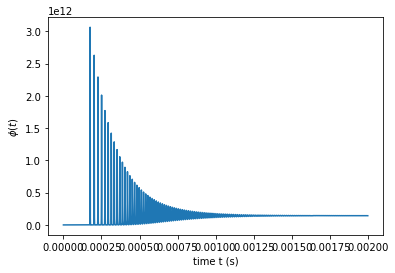

In [24]:
plt.ylabel('$\phi(t)$')
plt.xlabel('time t (s)')
plt.plot(t, phi)
plt.show()

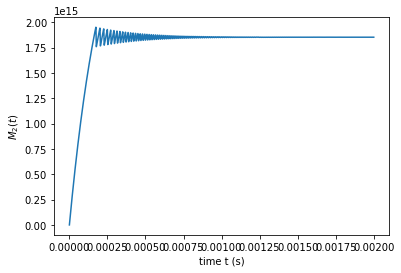

In [23]:
plt.ylabel('$M_2(t)$')
plt.xlabel('time t (s)')

plt.plot(t, M2)
plt.show()


### Hint (spoiler if you want to work it out yourself)

Your call to `odeint` should look like:

`phi, M2 = odeint(dydt, y0, t, args=(...).T`

where

`dydt` is a function `def dydt(y, t, ...):` that returns the right hand sides of the equations, i.e. the tuple  `dphidt, dM2dt`, where `y` is the tuple `phi, M` and  `...` refers to additional positional arguments needed (the parameters of the problem) which are the same arguments passed to `odeint` (and in the same order)

`y0` is a tuple of the initial conditions `dphidt` at t=0, `dM2dt` at t=0

`t` is the time axis (numpy array).

The `.T` transpose is necessary to unpack the data correctly; `phi` and `M2` will be arrays containing the values of `phi` and `M2` sampled on `t`.



**b)** Estimate the steady-state value of $\phi$.

**Answer:** The final values of phi give a good indication on the equilibrium number of photons in the cavity.

In [5]:
int(phi[-1])

142704585652

### Extension
**c)** Use `find_peaks` from `scipy.signal` to get the peaks of `phi` and plot them on top of the relaxation oscillations.

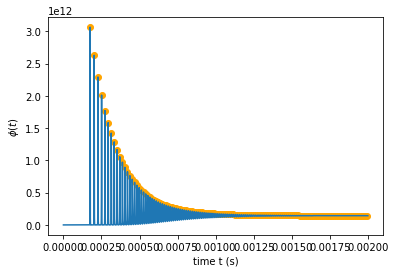

In [25]:
from scipy.signal import find_peaks

peaks = find_peaks(phi)[0]

plt.scatter(t[peaks], phi[peaks], c='orange')
plt.ylabel('$\phi(t)$')
plt.xlabel('time t (s)')
plt.plot(t, phi)
plt.show()

**d)** Use `curve_fit` from `scipy.optimize` to fit an exponential decay to the peaks to determine the the decay time of the relaxation oscillatons.

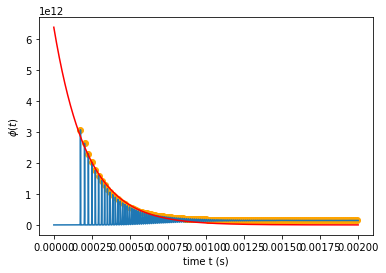

In [33]:
from scipy.optimize import curve_fit
import numpy as np

def exp(t, A, tau):
    return A*np.exp(-np.log(2)*t/tau)

p,cov = curve_fit(exp, t[peaks], phi[peaks], p0 = [3e12, 2e-4])

plt.scatter(t[peaks], phi[peaks], c='orange')

plt.ylabel('$\phi(t)$')
plt.xlabel('time t (s)')
plt.plot(t,phi)

plt.plot(t, exp(t, *p), c = 'red')

plt.show()

The optimal parameters are as follows

In [34]:
p

array([6.37028891e+12, 1.50715355e-04])